# Aplicación de búsqueda binaria para correlación de casos de propagación de SARS-CoV-2
El objetivo de este ejercicio es identificar períodos de tiempo en donde hubo un aumento de casos de la enfermedad provocada por este virus.

En primer lugar importaré algunas bibliotecas comunmente usadas en aplicaciones científicas. Estas bibliotecas ayudarán a ordenar los datos con los que trabajaré.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set some display style to graphs
plt.style.use('seaborn')
%matplotlib inline

Los datos con los que voy a trabajar se encuentran en [Our World In Data](https://ourworldindata.org/grapher/cumulative-covid-cases-region?tab=chart&stackMode=absolute&time=2020-01-05..latest&region=World). He descargado el archivo en formato CSV. Este archivo lo he cargado como un objeto *Dataframe* de *Pandas*.

In [2]:
data_all = pd.read_csv('cumulative-covid-cases-region.csv', parse_dates = ['Date'])

Ya que estoy interesado en encontrar picos solo en Colombia, filtro los datos por `Code = COL`.

In [3]:
data_col = data_all[data_all['Code'] == 'COL'].reset_index()
display(data_col)

,index,Entity,Code,Date,Total confirmed cases of COVID-19
0,13946,Colombia,COL,2020-03-06,1
1,13947,Colombia,COL,2020-03-07,1
2,13948,Colombia,COL,2020-03-08,1
3,13949,Colombia,COL,2020-03-09,1
4,13950,Colombia,COL,2020-03-10,3
...,...,...,...,...,...
347,14293,Colombia,COL,2021-02-16,2202598
348,14294,Colombia,COL,2021-02-17,2207701
349,14295,Colombia,COL,2021-02-18,2212525
350,14296,Colombia,COL,2021-02-19,2217001


## Método

Usaré la [búsqueda binaria](https://es.wikipedia.org/wiki/B%C3%BAsqueda_binaria) para hallar el período con mayor número de contagios. Para usar este método correctamente, mis datos deben tener ciertas características: deben estar previamente ordenados —en este caso, por la fecha `Date`—, y la columna con el criterio de búsqueda debe estar representada como una suma acumulativa —en este caso, por la columna `Total confirmed cases of COVID-19`—.

El criterio de ordenación es propio del algoritmo de búsaueda binaria, mientras que el criterio de suma acumulativa es propio de esta aplicación, y la explicaré con detalle más adelante.

Por el moomento es necesario comprender mejor los datos que tenemos. Para esto, las gráficas nos pueden dar algunas pista de lo que podemos hacer a continuación, y por lo tanto voy a hacer un gráfico de línea de casos vs. fecha: los dos datos que realmente tienen significado.

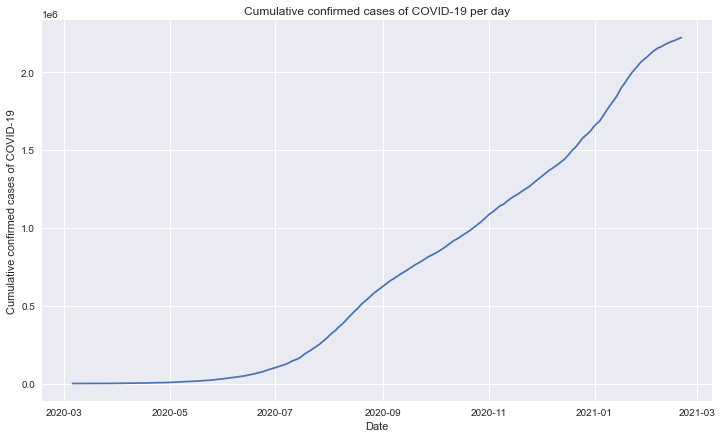

In [4]:
# Give a name for the x and y-axis
x_colname = 'Date'
y_colname = 'Total confirmed cases of COVID-19'

# Set-up the graph
plt.figure(figsize=(12,7))
plt.plot(data_col[x_colname], data_col[y_colname])

# Add some graph information
plt.xlabel('Date')
plt.ylabel('Cumulative confirmed cases of COVID-19')
plt.title('Cumulative confirmed cases of COVID-19 per day')

plt.show()

Este gráfico es esperado. Una suma acumulativa tiene esta forma y da el orden que necesito para aplicar la búsqueda binaria. Ahora podemos entrar a terreno matemático para explicar el concepto.

Podemos definir los períodos de mayor contagio como aquellos en donde la gráfica presenta una pendiente más inclinada. Ahora bien, las pendientes en una línea recta se pueden determinar por la ecuación de la línea recta: $y=mx+b$. Ya tenemos la suficiente información para buscar el período con más contagios, es decir, la pendiente más inclinada de la gráfica.

Pero antes de empezar, daré una muy breve introducción al algoritmo de búsqueda binaria: se trata de dividir siempre en dos el conjunto de datos, y buscar por el criterio (en este caso la ecuación de la recta) el conjunto que lo cumpla. El conjunto que no lo cumple se descarta y luego se vuelve a hacer lo mismo con el conjunto de datos que ha quedado. Se aplica esta iteración tantas veces como granular se quiera el resultado.

A continuación ejemplificaré esta aplicación.

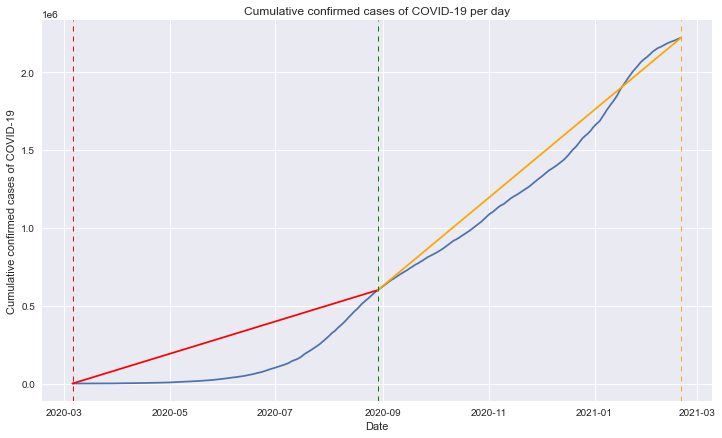

In [5]:
# Set-up left margin
left_index = 0
left_x = data_col[x_colname].iloc[left_index]
left_y = data_col[y_colname].iloc[left_index]

# Set-up right margin
right_index = data_col.index[-1]
right_x = data_col[x_colname].iloc[right_index]
right_y = data_col[y_colname].iloc[right_index]

# Set-up midpoint
mid_index = int(np.round(((right_index - left_index) / 2) + left_index))
mid_x = data_col[x_colname].iloc[mid_index]
mid_y = data_col[y_colname].iloc[mid_index]

# Set-up the graph
plt.figure(figsize=(12,7))
plt.plot(data_col[x_colname], data_col[y_colname])

# Left line
plt.plot([left_x, mid_x], [left_y, mid_y], color = 'red')

# Right line
plt.plot([mid_x, right_x], [mid_y, right_y], color = 'orange')

# Draw side limits and midpoint
plt.axvline(x=left_x, color = 'red', dashes = (5, 5), linewidth=1)
plt.axvline(x=mid_x, color = 'green', dashes = (5, 5), linewidth=1)
plt.axvline(x=right_x, color = 'orange', dashes = (5, 5), linewidth=1)

# Add some graph information
plt.xlabel('Date')
plt.ylabel('Cumulative confirmed cases of COVID-19')
plt.title('Cumulative confirmed cases of COVID-19 per day')

plt.show()

En la primera iteración se puede observar que la pendiente más grande se encuentra en el conjunto de datos del lado derecho (es la línea naranja), por lo que el conjunto de datos del lado izquierdo se debe descartar. Entonces, por el momento podemos concluir que el período de mayor contagio se ha presentado entre septiembre de 2020 y febrero de 2021. Aunque tenemos una conformación visual, debemos justificar esta conclusión matematicamente. Vamos a calcular las pendientes de ambos conjuntos de datos para verificar nuestra conclusión.

Como en cada iteración se van a descartas datos, y para que sea más fácil de ver el procedimiento, he dibujado los límites izquierdo y derecho con asíntotas verticales, siendo la roja para el límite izquierdo y la  naranja para el límite derecho.

Para continuar, debemos saber que la ecuación para hallar la pendiente $m$ de una recta, dados dos puntos, es $m=\frac{y_2-y_1}{x_2-x_1}$. Usaré esta fórmula para verificar mi conclusión. Y ya que usaremos esta fórmula, debemos hallar los índices del eje X porque los que usamos actualmente para graficar son fechas

In [6]:
# Print left point data
print('Left side')
print('  Start point = (%10d, %10d)' % (left_index, left_y))
print('  End point   = (%10d, %10d)' % (mid_index, mid_y))
print('  Slope       =    %20.2f' % ((mid_y - left_y) / (mid_index - left_index)))

# Print right point data
print('Right side')
print('  Start point = (%10d, %10d)' % (mid_index, mid_y))
print('  End point   = (%10d, %10d)' % (right_index, right_y))
print('  Slope       =    %20.2f' % ((right_y - mid_y) / (right_index - mid_index)))

# As left side is discarded, set it as the mid point ad recalculate the midpoint again

left_index = mid_index
left_x = mid_x
left_y = mid_y

mid_index = int(np.round(((right_index - left_index) / 2) + left_index))
mid_x = data_col[x_colname].iloc[mid_index]
mid_y = data_col[y_colname].iloc[mid_index]

Left side
  Start point = (         0,          1)
  End point   = (       176,     599884)
  Slope       =                 3408.43
Right side
  Start point = (       176,     599884)
  End point   = (       351,    2222018)
  Slope       =                 9269.34


Como observamos, $m_l=3408.43$ y $m_r=9269.34$. El lado derecho tiene una pendiente más grande y por lo tanto el lado izquierdo se descarta.

Como quiero más granularidad, repetiré el proceso varias veces hasta obtener el período específico. Esta vez voy a usar un ciclo para realizar este procedimiento. Lo único que se debe tener en cuenta son las siguientes reglas:

* Los índices del lado descartado se reemplazan por el punto medio actual
* En todas las iteraciones el punto medio se recalcula

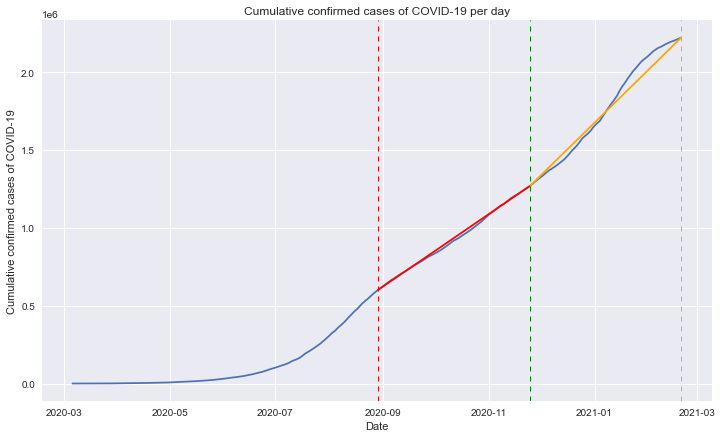

Iteration 1
  Left side
    Start point = (       176,     599884)
    End point   = (       264,    1270991)
    Slope       =                 7626.22
  Right side
    Start point = (       264,    1270991)
    End point   = (       351,    2222018)
    Slope       =                10931.34


<Figure size 432x288 with 0 Axes>

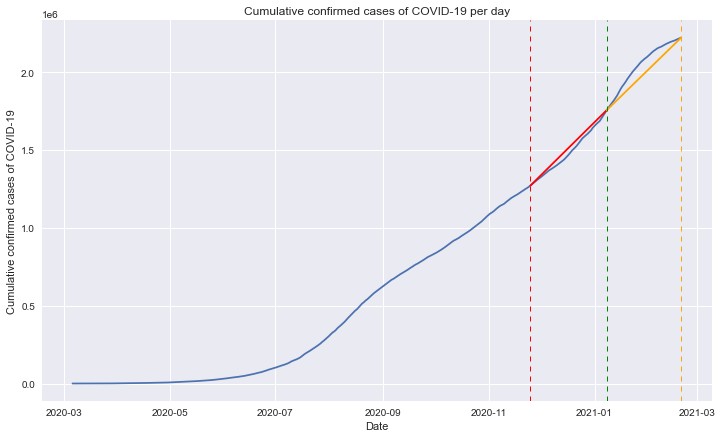

Iteration 2
  Left side
    Start point = (       264,    1270991)
    End point   = (       308,    1755568)
    Slope       =                11013.11
  Right side
    Start point = (       308,    1755568)
    End point   = (       351,    2222018)
    Slope       =                10847.67


<Figure size 432x288 with 0 Axes>

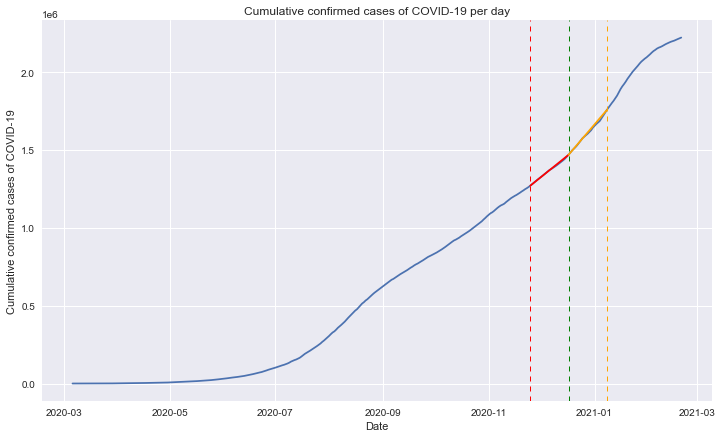

Iteration 3
  Left side
    Start point = (       264,    1270991)
    End point   = (       286,    1468795)
    Slope       =                 8991.09
  Right side
    Start point = (       286,    1468795)
    End point   = (       308,    1755568)
    Slope       =                13035.14


<Figure size 432x288 with 0 Axes>

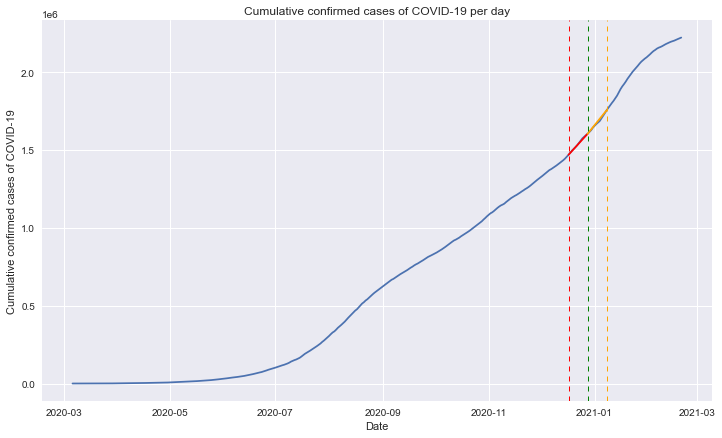

Iteration 4
  Left side
    Start point = (       286,    1468795)
    End point   = (       297,    1603807)
    Slope       =                12273.82
  Right side
    Start point = (       297,    1603807)
    End point   = (       308,    1755568)
    Slope       =                13796.45


<Figure size 432x288 with 0 Axes>

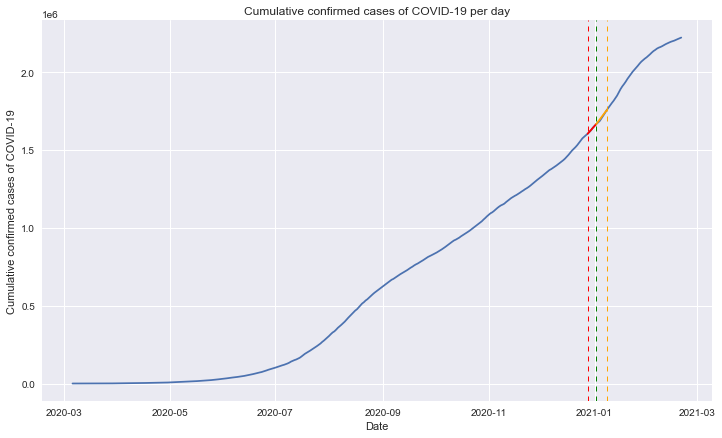

Iteration 5
  Left side
    Start point = (       297,    1603807)
    End point   = (       302,    1666408)
    Slope       =                12520.20
  Right side
    Start point = (       302,    1666408)
    End point   = (       308,    1755568)
    Slope       =                14860.00


<Figure size 432x288 with 0 Axes>

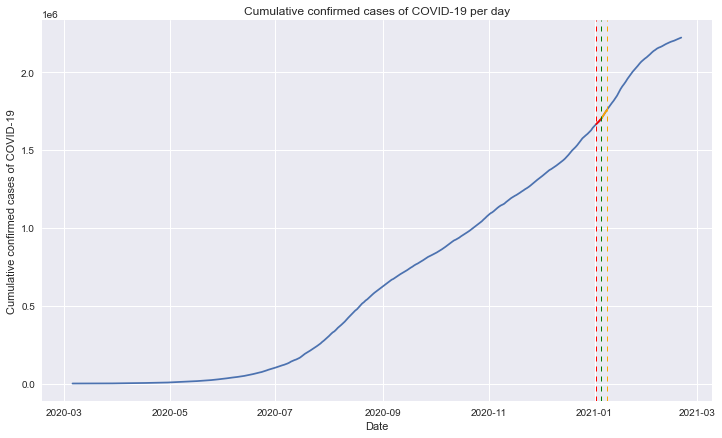

Iteration 6
  Left side
    Start point = (       302,    1666408)
    End point   = (       305,    1702966)
    Slope       =                12186.00
  Right side
    Start point = (       305,    1702966)
    End point   = (       308,    1755568)
    Slope       =                17534.00


<Figure size 432x288 with 0 Axes>

In [7]:
# Iterate over the data
for i in range(1, 7):
    # Set-up the graph
    plt.figure(figsize=(12,7))
    plt.plot(data_col[x_colname], data_col[y_colname])

    # Left line
    plt.plot([left_x, mid_x], [left_y, mid_y], color = 'red')

    # Right line
    plt.plot([mid_x, right_x], [mid_y, right_y], color = 'orange')

    # Draw side limits and midpoint
    plt.axvline(x=left_x, color = 'red', dashes = (5, 5), linewidth=1)
    plt.axvline(x=mid_x, color = 'green', dashes = (5, 5), linewidth=1)
    plt.axvline(x=right_x, color = 'orange', dashes = (5, 5), linewidth=1)

    # Add some graph information
    plt.xlabel('Date')
    plt.ylabel('Cumulative confirmed cases of COVID-19')
    plt.title('Cumulative confirmed cases of COVID-19 per day')

    # Render the image
    plt.show()
    plt.clf()
    
    # Print information about the slope calculation
    print('Iteration %d' % i)
    left_slope = (mid_y - left_y) / (mid_index - left_index)
    print('  Left side')
    print('    Start point = (%10d, %10d)' % (left_index, left_y))
    print('    End point   = (%10d, %10d)' % (mid_index, mid_y))
    print('    Slope       =    %20.2f' % ((mid_y - left_y) / (mid_index - left_index)))

    # Print right point data
    print('  Right side')
    right_slope = (right_y - mid_y) / (right_index - mid_index)
    print('    Start point = (%10d, %10d)' % (mid_index, mid_y))
    print('    End point   = (%10d, %10d)' % (right_index, right_y))
    print('    Slope       =    %20.2f' % ((right_y - mid_y) / (right_index - mid_index)))
    
    # Then select and discard the side that has the lowest slope
    if left_slope > right_slope:
        right_index = mid_index
        right_x = mid_x
        right_y = mid_y
    else:
        left_index = mid_index
        left_x = mid_x
        left_y = mid_y
        
    # And always update the mid point
    mid_index = int(np.round(((right_index - left_index) / 2) + left_index))
    mid_x = data_col[x_colname].iloc[mid_index]
    mid_y = data_col[y_colname].iloc[mid_index]

Observe cómo el algoritmo navega entre la gráfica, y va descartando la menor pendiente en cada iteración. Al final podemos decir con certeza que el mayor número de contagios se ha presentado durante los primeros días de enero. También sabemos que el virus tarda entre 5 y 15 días en mostrar síntomas, por lo que los enfermos dentro del período de mayor número de contagios se tuvo que haber infectado a mediados de diciembre. En conclusión, la fiesta de navidad fue la que más contribuyó a los infectados en Colombia.

## Para pensar y aplicar lo aprendido

* ¿Se te ocurren otras aplicaciones para este algoritmo?
* Este procedimiento tiene algunas limitaciones. ¿Puedes identificarlas?
* ¿Cuándo se presenta el mayor número de contagio en otros países? Prueba a cambiar `COL` por otro código de país y mira los datos que se generan para ellos. Prueba con `FRA`, `PER`, `CHL`, `USA`, y con otros más.